# Testing Addicted Q Agent When Higher Natural Reward Presented

In [91]:
%load_ext autoreload
%autoreload 2

from q_addicted import Addicted_Q_Agent
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basic Configurations

In [148]:
CONFIGS = {
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1,
    'num_trials': 100,
    'num_states': 10,
    'num_actions': 3,
    'initial_dopamine_surge': 1,
    'dopamine_decay_rate': 0.99,
    'reward_states': [0, 5, 10],
    'drug_reward': 1,
    'addicted': True,
    'exploration_strategy': 'epsilon_greedy',
    'if_natural': True,
    'natural_reward_states': [3],
    'natural_reward_boost': 2
}

# Addicted Agent Learning

In [149]:
agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    CONFIGS['exploration_strategy'],
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)
rpe, Q_across_trials = agent.learning()

# Stochastic process comparison (random walk) for average visit time

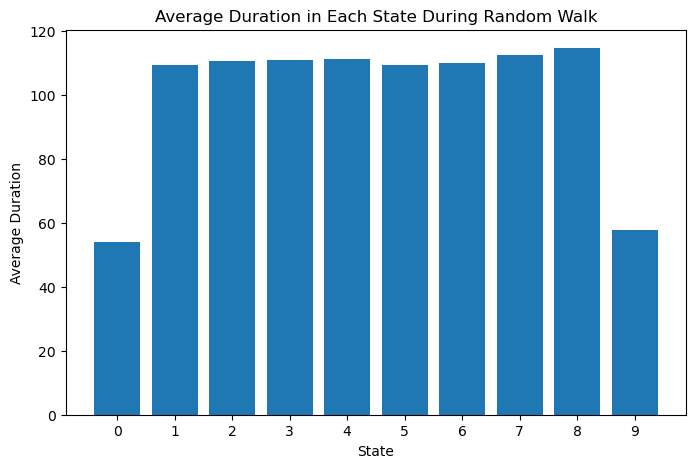

In [150]:
num_trials = 100
num_steps = 1000
avg_durations = agent.random_walk(num_trials, num_steps)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State During Random Walk')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

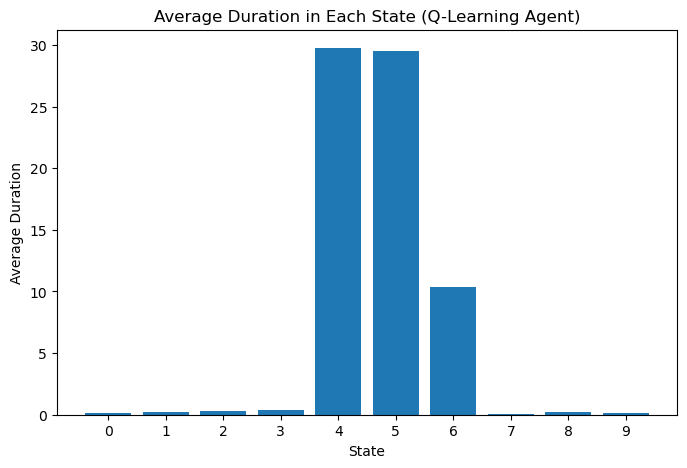

In [151]:
num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State (Q-Learning Agent)')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

Very interesting result, the drug reward states are state 0, 5, 10 and the natural reward state is state 3. The Q-value function is not really helping the agent to build a robust understanding of the space (acknowledging that this is only at iter=100, with increasing in iteration to about iter=10000, the agent is still as robust in the performance, an further research question can investigate into this aspect). However. the key observation is that the highest duration is always surrounding one of the drug state, seems like once addiction captures the agent, it is very hard to escape, even to other addicted states (this uses epsilon-greedy algorithm alread). One key observation is that the addicted states near the end of the chain seems to be never really explored because it is alwyas trapped somewhere in the previous part of the chain.

During implementation, seems like once the number of state is greater than 5, the agent is just jumping back and forth between states and seems to stuck there (must use a counter to ensur ethat the while loop actually breaks).

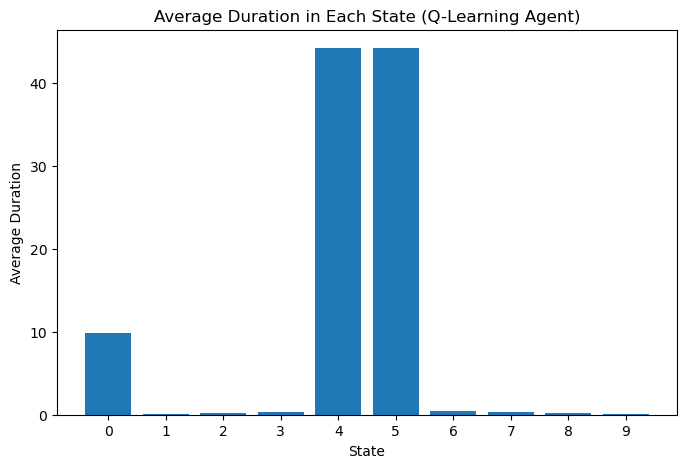

In [157]:
agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    False,
    CONFIGS['exploration_strategy'],
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)
rpe, Q_across_trials = agent.learning()

num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State (Q-Learning Agent)')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

With no addiction simulation, it seems like it is perform a little bit better.